In [1]:
import numpy as np
import pandas as pd

In [2]:
probe_raw = pd.read_csv('LAHarborJune12018', 
                  names = ["PROBE_ID","SAMPLE_DATE", "LAT", "LONG", "HEADING",\
                           "SPEED","PROBE_DATA_PROVIDER","X","Y", "LOCAL_TIME"])


In [3]:
probe_raw.head()

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
0,2869bff918e442c9b9be9d079dede349,2018-06-01 00:57:49,34.059920,-118.445030,183.0,4.00000,CONSUMER21,366643.071142,3.769742e+06,2018-05-31 17:57:49 -0700
1,24046157,2018-06-01 00:57:59,33.808750,-118.298480,182.0,73.00000,FLEET51,379816.173355,3.741709e+06,2018-05-31 17:57:59 -0700
2,2DD764B9-0E69-4EEC-9A91-8A36236586C4,2018-06-01 00:59:02,33.931794,-117.961762,90.0,51.00000,CONSUMER14,411110.854783,3.755010e+06,2018-05-31 17:59:02 -0700
3,19727088,2018-06-01 00:58:35,34.076356,-118.366926,359.0,33.00000,FLEET51,373875.915588,3.771465e+06,2018-05-31 17:58:35 -0700
4,0C03FB6E00,2018-06-01 00:58:05,34.003930,-118.238850,123.0,17.70274,FLEET41,385596.790831,3.763283e+06,2018-05-31 17:58:05 -0700


In [4]:
probe_raw.shape

(13027090, 10)

In [12]:
p2 = (33.586105, -117.877647)
p1 = (33.655834, -117.947146)


In [19]:
def crop_region(probe_raw, p1, p2):
    
    sample_df_out = probe_raw[(probe_raw['LAT'] > p2[0]) &
                    (probe_raw['LAT'] < p1[0]) &
                    (probe_raw['LONG'] > p1[1]) &
                    (probe_raw['LONG'] < p2[1])]
    
    return sample_df_out

In [20]:
crop_probe = crop_region(probe_raw, p1, p2)


In [21]:
crop_probe.shape


(82923, 10)

In [22]:
crop_probe.head()

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
595,1168071,2018-06-01 00:57:33,33.653830,-117.906870,208.0,2.0,FLEET40,415912.970444,3.724143e+06,2018-05-31 17:57:33 -0700
1098,d4933e2065574c05b96dd2d2f36f88ad,2018-06-01 00:52:52,33.643480,-117.927900,277.0,36.0,CONSUMER21,413952.657092,3.723013e+06,2018-05-31 17:52:52 -0700
1104,87f1e18da90c420ea0f7e164eda73dd0,2018-06-01 00:52:19,33.620690,-117.923790,130.0,4.0,CONSUMER21,414311.237399,3.720483e+06,2018-05-31 17:52:19 -0700
1109,87f1e18da90c420ea0f7e164eda73dd0,2018-06-01 00:52:14,33.620770,-117.923840,156.0,9.0,CONSUMER21,414306.678548,3.720492e+06,2018-05-31 17:52:14 -0700
1652,24036315,2018-06-01 00:55:44,33.643713,-117.916399,221.0,0.0,FLEET51,415019.448855,3.723029e+06,2018-05-31 17:55:44 -0700


In [23]:
import matplotlib.pyplot as plt

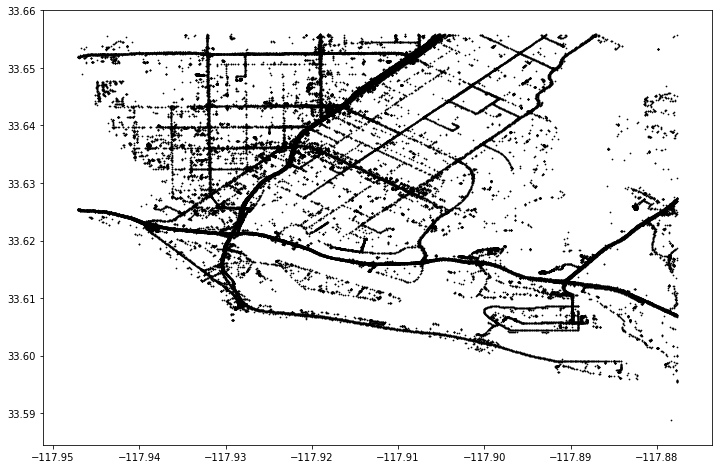

In [24]:
plt.figure(figsize = (12,8))
plt.scatter(crop_probe.LONG, crop_probe.LAT, s = 0.5, c = 'k')
plt.show()

In [14]:
crop_probe.to_csv('crop_data.csv')